In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from helper import preprocess as preproc
from helper import util as utility
from helper import ml_model as md


X_train size:  (622, 13)
Accuracy :  0.8141025641025641
[[69 13]
 [16 58]]
CV with K-Fold roc_auc score: 0.807 (+/- 0.03)


C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

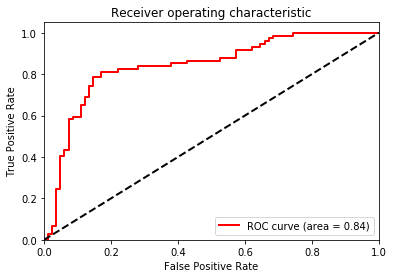

In [2]:
processed_df = pd.read_csv("data store/training_dataset_processed.csv")

y = processed_df["BK"]
X = processed_df.drop(["BK"], axis=1)

lr_model = md.logistic_regression()
holdout_lr = md.train_tuning(lr_model, X, y)
kfold_lr = md.train_kfold_cv(lr_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_lr, X, y)
display()

X_train size:  (622, 13)
Accuracy :  0.5833333333333334
[[77  5]
 [60 14]]
CV with K-Fold roc_auc score: 0.811 (+/- 0.05)


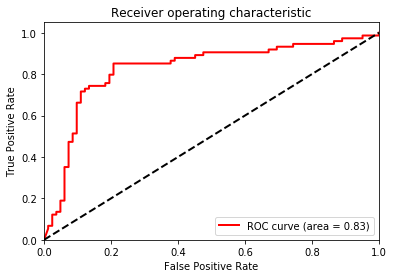

In [3]:
NB_model = md.naive_bayes()
holdout_nb = md.train_tuning(NB_model, X, y)
kfold_nb = md.train_kfold_cv(NB_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_nb, X, y)
display()

X_train size:  (622, 13)
Accuracy :  0.8269230769230769
[[69 13]
 [14 60]]


C:\Users\junsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


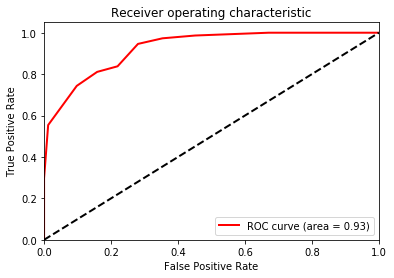

In [8]:
RF_model = md.random_forest()
RF_params = {'n_estimators': [80, 100, 120], 'max_depth': [3,4,5], 'max_leaf_nodes': [14, 16]}
RF_params={}

RF_tuned = md.train_tuning(RF_model, X, y, RF_params, "roc_auc")
md.roc_auc_plot(RF_tuned, X, y)
display()

X_train size:  (622, 13)
Accuracy :  0.8782051282051282
[[74  8]
 [11 63]]
CV with K-Fold roc_auc score: 0.944 (+/- 0.03)


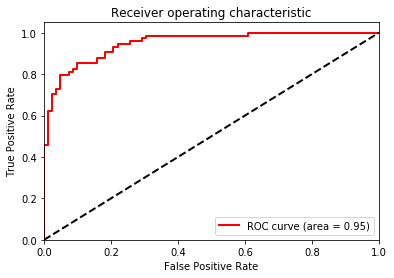

In [6]:
GB_model = md.gradient_boosting()
holdout_GB = md.train_tuning(GB_model, X, y)
kfold_GB = md.train_kfold_cv(GB_model, X, y, 5, "roc_auc")
md.roc_auc_plot(kfold_GB, X, y)
display()

X_train size:  (622, 13)
Accuracy :  0.8269230769230769
[[60 22]
 [ 5 69]]


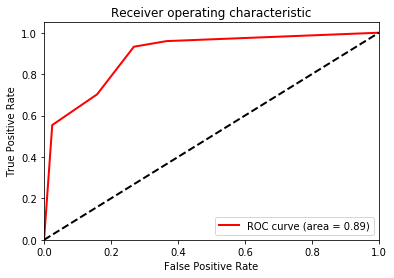

In [7]:
DT_model = md.decision_tree()
DT_param = {'max_depth': [2,3,4,5,6,7,8], 'criterion': ["gini", "entropy"], 'max_leaf_nodes': [5, 10, 20]}
DT_tuned = md.train_tuning(DT_model, X, y, DT_param, "roc_auc")
md.roc_auc_plot(DT_tuned, X, y)
display()

In [9]:
# Evaluate on eval set:
eval_data = pd.read_csv('data store/evaluation_dataset_processed.csv')
print(eval_data.shape)

(85, 14)


In [10]:
eval_y = eval_data["BK"]
eval_X = eval_data.drop(["BK"], axis=1)


In [11]:
lr_y_pred = kfold_lr.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, lr_y_pred))
print(confusion_matrix(eval_y, lr_y_pred))

Accuracy :  0.7058823529411765
[[31 10]
 [15 29]]


In [12]:
nb_y_pred = kfold_nb.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, nb_y_pred))
print(confusion_matrix(eval_y, nb_y_pred))

Accuracy :  0.5411764705882353
[[ 3 38]
 [ 1 43]]


In [13]:
rf_y_pred = RF_tuned.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, rf_y_pred))
print(confusion_matrix(eval_y, rf_y_pred))

Accuracy :  0.7647058823529411
[[32  9]
 [11 33]]


In [14]:
gb_y_pred = kfold_GB.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, gb_y_pred))
print(confusion_matrix(eval_y, gb_y_pred))

Accuracy :  0.7647058823529411
[[32  9]
 [11 33]]


In [15]:
dt_y_pred = DT_tuned.predict(eval_X)
print('Accuracy : ', accuracy_score(eval_y, dt_y_pred))
print(confusion_matrix(eval_y, dt_y_pred))

Accuracy :  0.8
[[33  8]
 [ 9 35]]
